# Imports

In [1]:
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from numpy.random import normal, uniform, shuffle
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor

import dill
import datetime

In [2]:
%matplotlib inline

In [17]:
# SEED = 73 # random seed

In [18]:
# dill.load_session('cache/data_preparation.db')

In [19]:
# dill.dump_session('cached/1_Data_preparation.db')

# Data reading

## Reading

In [3]:
csvs = [x for x in os.listdir('data/') if x.endswith('.csv')] # читаем имена файлов .csv

In [4]:
needed_csvs = []

for s in csvs:
    if 'CDC' in s:
        needed_csvs.append(s)

In [52]:
nms = [x.split('.')[0] for x in needed_csvs] # список имён будущих датафреймов сделаем без расширений

In [11]:
needed_csvs

['AP1_CDCFrontier_LD.csv',
 'AP1_CDCFrontier_SD.csv',
 'FD_CDCFrontier_LD.csv',
 'FD_CDCFrontier_SD.csv',
 'FTa1_CDCFrontier_LD.csv',
 'FTa1_CDCFrontier_SD.csv',
 'FTa2_CDCFrontier_LD.csv',
 'FTa2_CDCFrontier_SD.csv',
 'FTa3_CDCFrontier_LD.csv',
 'FTa3_CDCFrontier_SD.csv',
 'FTb_CDCFrontier_LD.csv',
 'FTb_CDCFrontier_SD.csv',
 'FTc_CDCFrontier_LD.csv',
 'FTc_CDCFrontier_SD.csv',
 'LFY_CDCFrontier_LD.csv',
 'LFY_CDCFrontier_SD.csv',
 'TFL1a_CDCFrontier_LD.csv',
 'TFL1a_CDCFrontier_SD.csv',
 'TFL1c_CDCFrontier_LD.csv',
 'TFL1c_CDCFrontier_SD.csv']

In [13]:
LD_csvs = [fname for fname in needed_csvs if 'LD' in fname]

In [14]:
LD_csvs

['AP1_CDCFrontier_LD.csv',
 'FD_CDCFrontier_LD.csv',
 'FTa1_CDCFrontier_LD.csv',
 'FTa2_CDCFrontier_LD.csv',
 'FTa3_CDCFrontier_LD.csv',
 'FTb_CDCFrontier_LD.csv',
 'FTc_CDCFrontier_LD.csv',
 'LFY_CDCFrontier_LD.csv',
 'TFL1a_CDCFrontier_LD.csv',
 'TFL1c_CDCFrontier_LD.csv']

In [15]:
len(LD_csvs)

10

In [55]:
for i in range(len(nms)):
    nms[i] = '_'.join(nms[i].split('_CDCFrontier_'))

In [56]:
nms = [name for name in nms if name.endswith('LD')]

In [57]:
nms

['AP1_LD',
 'FD_LD',
 'FTa1_LD',
 'FTa2_LD',
 'FTa3_LD',
 'FTb_LD',
 'FTc_LD',
 'LFY_LD',
 'TFL1a_LD',
 'TFL1c_LD']

**Create a list of genes:**

In [17]:
genes = []
for i in range(len(nms)):
    genes.append(nms[i][:-3])

genes = list(set(genes))

In [18]:
genes.sort()

In [19]:
genes

['AP1', 'FD', 'FTa1', 'FTa2', 'FTa3', 'FTb', 'FTc', 'LFY', 'TFL1a', 'TFL1c']

In [21]:
data = {}
for i in range(len(genes)):
    data[genes[i]] = pd.read_csv('data/' + LD_csvs[i], header=None, names = ['days', 'rltv_transcription_lvl', 'std_error'])

In [22]:
print(len(data['FTa2']))
# print(len(data['FTa2_SD']))

15


In [146]:
data_path

'data/prepared/LD_only/'

In [24]:
data['FTb']

,days,rltv_transcription_lvl,std_error
0,9,3,68.91
1,11,7,68.91
2,13,6,68.91
3,15,28,68.91
4,17,12,68.91
5,20,58,68.91
6,22,7,68.91
7,25,127,68.91
8,28,61,68.91
9,30,102,68.91


## Delete last

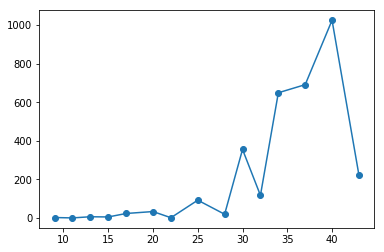

In [25]:
plt.plot(data['AP1'].days, data['AP1'].rltv_transcription_lvl, 'o-');

let's remove last measurements:

In [26]:
for name in data.keys():
    data[name] = data[name].iloc[:-1,:]

In [28]:
print(len(data['FTa2']))

14


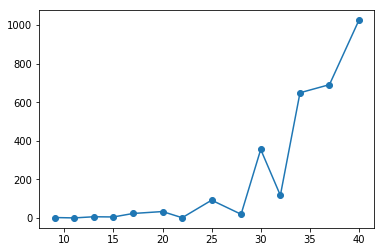

In [30]:
plt.plot(data['AP1'].days, data['AP1'].rltv_transcription_lvl, 'o-');

# Create real experiment dataset

In [36]:
genes + ['days']

['AP1',
 'FD',
 'FTa1',
 'FTa2',
 'FTa3',
 'FTb',
 'FTc',
 'LFY',
 'TFL1a',
 'TFL1c',
 'days']

In [31]:
real_data = pd.DataFrame(columns=genes + ['days'])

In [32]:
for name in genes:
    real_data[name] = data[name].rltv_transcription_lvl
    real_data['days'] = data['AP1'].days

In [33]:
real_data

,AP1,FD,FTa1,FTa2,FTa3,FTb,FTc,LFY,TFL1a,TFL1c,days
0,2,31.53,2,8,0.9,3,0,6.4,22.021,25.556,9
1,0,47.62,0,11,0.5,7,0,12.1,20.489,25.263,11
2,6,45.41,1,29,0.8,6,0,21.4,27.397,32.982,13
3,5,40.89,5,60,10.2,28,0,56.8,33.074,39.708,15
4,23,79.47,9,50,1.3,12,0,77.1,42.561,32.222,17
5,33,71.69,40,86,2.5,58,0,48.9,54.798,67.895,20
6,1,25.86,10,18,3.4,7,0,16.0,8.314,11.930,22
7,92,43.31,10,68,4.7,127,0,45.1,18.325,25.731,25
8,19,45.20,10,37,2.1,61,0,27.7,15.851,18.713,28
9,355,81.78,6,52,14.8,102,14,50.9,22.232,29.766,30


In [39]:
data_path= 'data/prepared/LD_only/'

In [34]:
real_data.to_csv(f'{data_path}real_LD.csv', index = False)

In [35]:
targets = [name for name in genes if not name.startswith('FT')]

In [36]:
targets

['AP1', 'FD', 'LFY', 'TFL1a', 'TFL1c']

In [37]:
real_X = real_data.iloc[:-1, :]

In [38]:
real_Y = real_data[targets].iloc[1:,]

In [40]:
real_X.to_csv(f'{data_path}/real_X.csv', index = False)
real_Y.to_csv(f'{data_path}/real_Y.csv', index = False)

# Resampling

## Generate samples 

In [44]:
days_LD = real_data.days.tolist()

In [47]:
# for name in nms:
#     for day in data[name]['days']:
        
#         mean = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
#         std = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
        
#         if name.endswith('LD'):
#             if day < 37:
#                 daily_levels['LD'][day][name[:-3]] = normal(mean, std, 500)
#             else:
#                 daily_levels['LD'][day][name[:-3]] = normal(mean, std, 1000)
            
#         if name.endswith('SD'):
#             daily_levels['SD'][day][name[:-3]] = abs(normal(mean, std, 500))
        

In [112]:
def generate_samples(data):

    daily_levels = {}

    for day in days_LD:
        daily_levels[day] = {}
    
    for name in data.keys():
        for day in data[name]['days']:

            mean = float(data[name][data[name]['days'] == day].loc[:, 'rltv_transcription_lvl'])
            std = float(data[name][data[name]['days'] == day].loc[:, 'std_error'])

            samples = normal(mean, std, 3000)
            samples = samples[samples > 0]
            daily_levels[day][name] = samples[:1000]    
    
    return daily_levels

In [113]:
daily_levels = generate_samples(data)

In [114]:
for k in daily_levels.keys():
    for k2, v in daily_levels[k].items():
        if len(v) < 1000:
            print(k2)
print('OK')

OK


In [115]:
list(daily_levels[9].keys()) == genes

True

In [116]:
for k in daily_levels.keys():
    
    print(k,':')
    
    if list(daily_levels[k].keys()) != genes:
        print('smth wrong!')

9 :
11 :
13 :
15 :
17 :
20 :
22 :
25 :
28 :
30 :
32 :
34 :
37 :
40 :


## Inter/extra-polate values to all missing days

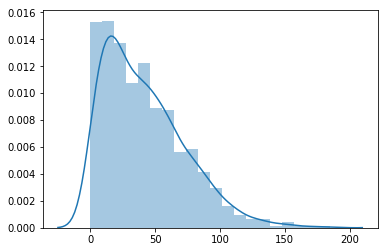

In [88]:
sns.distplot(daily_levels[11]['AP1'], bins = 20)

### Set FT level shift to 1/2 of a day:

In [117]:
for key in daily_levels.keys():
    print(key, ':', len(daily_levels[key]['AP1']))

9 : 1000
11 : 1000
13 : 1000
15 : 1000
17 : 1000
20 : 1000
22 : 1000
25 : 1000
28 : 1000
30 : 1000
32 : 1000
34 : 1000
37 : 1000
40 : 1000


In [118]:
days_LD

[9, 11, 13, 15, 17, 20, 22, 25, 28, 30, 32, 34, 37, 40]

In [119]:
daily_levels[9]['FTb'][0]

22.65782572849159

In [121]:
def move_FTs(daily_levels_original):
    
    daily_levels = daily_levels_original.copy()
    
    for name in genes:
        if name.startswith('FT'):
            current_FT = [[] for i in range(len(daily_levels))]
            
            current_FT[0] = daily_levels[days_LD[0]][name] * 17. / 18. # move first day
            
            for i in range(1, len(daily_levels)):
                ''' shift is 1/2 for 1 day difference 
                between observations, 3/4 for 2 days, etc.
                so let's define factor w'''
                w = 1 - 1 / (2 * (days_LD[i] - days_LD[i-1]))
                
                current_FT[i] = w * np.add(daily_levels[days_LD[i]][name],
                                               daily_levels[days_LD[i-1]][name])

            for i in range(len(daily_levels)):
                daily_levels[days_LD[i]][name] = current_FT[i]
    
    return daily_levels

In [122]:
daily_levels_original = daily_levels.copy()

In [123]:
daily_levels = move_FTs(daily_levels_original)

In [124]:
daily_levels[9]['FTb'][0]

21.39905763246428

### Try to free the memory:

In [93]:
# def free_memory(variables_list):
#     for name in variables_list:
#         del name

In [94]:
# for key in globals().keys():
#     print(key)

### Save the data

In [95]:
# with open('cache/samples_by_day.cached', 'wb') as f:
#     dill.dump(daily_levels, f)

### Check the trend

In [128]:
for k in daily_levels.keys():
    print(k, ':', np.mean(daily_levels[k]['AP1']))

9 : 42.940150878617686
11 : 40.94961935186764
13 : 43.871761157519785
15 : 44.781666299583335
17 : 50.73822357832045
20 : 56.024852891398886
22 : 40.62778550152018
25 : 117.81794262436068
28 : 52.12900631269186
30 : 356.8419464398351
32 : 119.44496944367775
34 : 640.8277446670226
37 : 696.0913071278367
40 : 1018.3654526510956


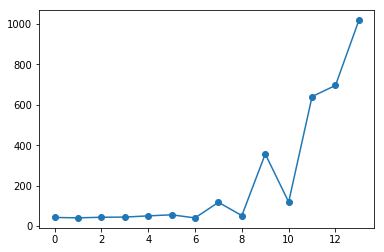

In [131]:
plt.plot([np.mean(daily_levels[k]['AP1']) for k in days_LD], '-o')

In [132]:
data['AP1'][['days', 'rltv_transcription_lvl']]

,days,rltv_transcription_lvl
0,9,2
1,11,0
2,13,6
3,15,5
4,17,23
5,20,33
6,22,1
7,25,92
8,28,19
9,30,355


In [156]:
test = []

for k in daily_levels['LD'].keys():
    test.append(daily_levels['LD'][k]['AP1'][300])

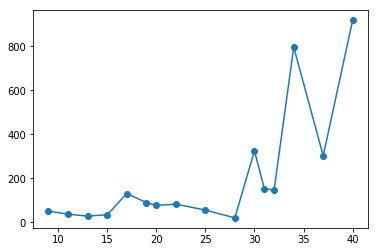

In [157]:
plt.plot(days_all, test, '-o')

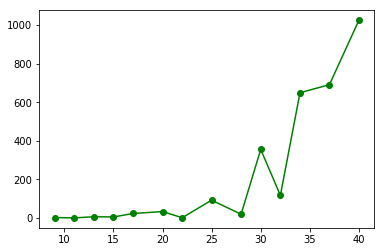

In [158]:
plt.plot(data['AP1_LD'].days, data['AP1_LD'].rltv_transcription_lvl, 'go-')

# Train-test split

In [161]:
for day in days_LD:
#     if day < 37:
#         for cond in conditions:
#             temp_df = pd.DataFrame(daily_levels[cond][day]).iloc[:375, :]
#             temp_df['days'] = day
#             train_set = train_set.append(temp_df)
            
#             temp_df = pd.DataFrame(daily_levels[cond][day]).iloc[375:500, :]
#             temp_df['days'] = day
#             test_set = test_set.append(temp_df)
#     else:
    temp_df = pd.DataFrame(daily_levels[day]).iloc[:750, :]
    temp_df['days'] = day
    train_set = train_set.append(temp_df)

    temp_df = pd.DataFrame(daily_levels[day]).iloc[750:1000, :]
    temp_df['days'] = day
    test_set = test_set.append(temp_df)

In [136]:
def my_tr_t_split(daily_data):
    
    train_set = pd.DataFrame(columns=genes + ['days'])
    test_set = pd.DataFrame(columns=genes + ['days'])
    
    for day in days_LD:

        temp_df = pd.DataFrame(daily_data[day]).iloc[:750, :]
        temp_df['days'] = day
        train_set = train_set.append(temp_df)

        temp_df = pd.DataFrame(daily_data[day]).iloc[750:1000, :]
        temp_df['days'] = day
        test_set = test_set.append(temp_df)

    return train_set, test_set

In [138]:
train_set, test_set = my_tr_t_split(daily_levels)

In [139]:
train_set.tail()

,AP1,FD,FTa1,FTa2,FTa3,FTb,FTc,LFY,TFL1a,TFL1c,days
745,686.669585,132.591502,45.466719,192.473880,52.917021,158.372764,45.615654,81.210510,14.432262,33.341479,40
746,918.815009,110.296230,101.197282,158.338042,31.590721,61.823357,93.270036,92.186444,13.367673,42.642787,40
747,742.434906,137.745811,41.450225,156.930095,19.246574,94.715723,59.727618,114.042272,15.128368,19.433130,40
748,1139.814326,134.340548,63.091863,135.239937,36.790968,112.646358,19.510417,49.470184,15.898169,35.749122,40
749,1081.628355,135.388366,78.102312,65.351571,24.301517,142.985311,15.217854,31.495025,14.847826,45.300037,40


In [140]:
test_set.days.value_counts()

40    250
37    250
34    250
32    250
30    250
28    250
25    250
22    250
20    250
17    250
15    250
13    250
11    250
9     250
Name: days, dtype: int64

In [141]:
train_set.days.value_counts()

40    750
37    750
34    750
32    750
30    750
28    750
25    750
22    750
20    750
17    750
15    750
13    750
11    750
9     750
Name: days, dtype: int64

In [142]:
X_train = train_set[train_set['days'] < 40]
X_test = test_set[test_set['days'] < 40]

In [143]:
FTs = [x for x in genes if x.startswith('FT')]
FTs

['FTa1', 'FTa2', 'FTa3', 'FTb', 'FTc']

In [144]:
y_train = train_set[train_set['days'] > 9].drop(FTs, axis=1)
y_test = test_set[test_set['days'] > 9].drop(FTs, axis=1)

## Write data to csvs 

In [145]:
X_train.to_csv(f'{data_path}X_train.csv', index=False)
X_test.to_csv(f'{data_path}X_test.csv', index=False)

y_train.to_csv(f'{data_path}y_train.csv', index=False)
y_test.to_csv(f'{data_path}y_test.csv', index=False)

train_set.to_csv(f'{data_path}train.csv', index=False)
test_set.to_csv(f'{data_path}test.csv', index=False)

# Model

In [ ]:
model = RandomForestRegressor()

In [ ]:
cv = TimeSeriesSplit(n_splits=len(days_all))

In [ ]:
def logging(description, out):
    string = str(description) + ': ' + str(out)
    with open('results/NN/NN_log.txt', 'a') as out_file:
        out_file.write(string + '\n')
    print(string)

In [ ]:
def clear_log():
    with open('results/NN/NN_log.txt', 'w') as out_file:
        out_file.write('log file have been cleared ' + str(datetime.datetime.now().strftime('%d-%m-%Y %H:%M:%S')))

In [ ]:
with open('cache/NN_model.cached', 'rb') as file:
    model = dill.load(file)

In [ ]:
with open('cache/st_scaler.cached', 'rb') as f:
    st_scalers = dill.load(f)

In [ ]:
dill.dump_session('cache/data_preparation.db')